In [2]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
df = pd.read_csv("../data/processed/clean_data.csv")
df = df.drop_duplicates(["report_id","patient_age","description","sex"],ignore_index = True)

/Users/jianghongwan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
age_conv = {}
age_conv["month(s)"] = 1/12
age_conv["year(s)"] = 1
age_conv["day(s)"] = 1/365
age_conv["Decade(s)"] = 10
age_conv['week(s)'] = 1/52
age_dist = defaultdict(int)
def clean_data(df,column):
    return df[column].strip() if isinstance(df[column],str) else df[column]

In [57]:
product_count = defaultdict(int)
prod_to_code = {}
code_to_prod = defaultdict(list)
prod_type = defaultdict(int)
sex = defaultdict(int)
code_to_des = defaultdict(list)
code_count = defaultdict(int)
avg_age = 0
count = 0
min_age = 100
max_age = 0
gender_age_dist = defaultdict(list)
gender_to_product = defaultdict(list)
age_count = defaultdict(float)
des_to_code = defaultdict(list)
male_code_count = defaultdict(int)
female_code_count = defaultdict(int)
for a in df.iloc():
    prod = clean_data(a,"product")
    code = clean_data(a,"product_code")
    age = clean_data(a,"patient_age")
    unit = clean_data(a,"age_units")
    gender = clean_data(a,"sex")
    description = clean_data(a,"description")
    if not pd.isna(age):
        age = int(age)*age_conv[unit]
        avg_age+=age
        count+=1
        min_age = min(age,min_age)
        max_age = max(age,max_age)
        age_count[age]+=1
        gender_age_dist[gender].append(age)
        age = round(age/10)*10
        age_dist[age]+=1
    product_count[prod] +=1
    sex[gender] +=1
    if pd.isna(code):
        continue
    code = str(code)
    if gender =="M":
        male_code_count[code]+=1
    elif gender=="F":
        female_code_count[code]+=1
    if prod not in prod_to_code:
        prod_to_code[prod] = code
    if code not in des_to_code[description]:
        des_to_code[description].append(code)
    code_count[code]+=1
    if prod not in code_to_prod[code]:
        code_to_prod[code].append(prod)
    if description not in code_to_des[code]:
        code_to_des[code].append(description)
avg_age = avg_age/count

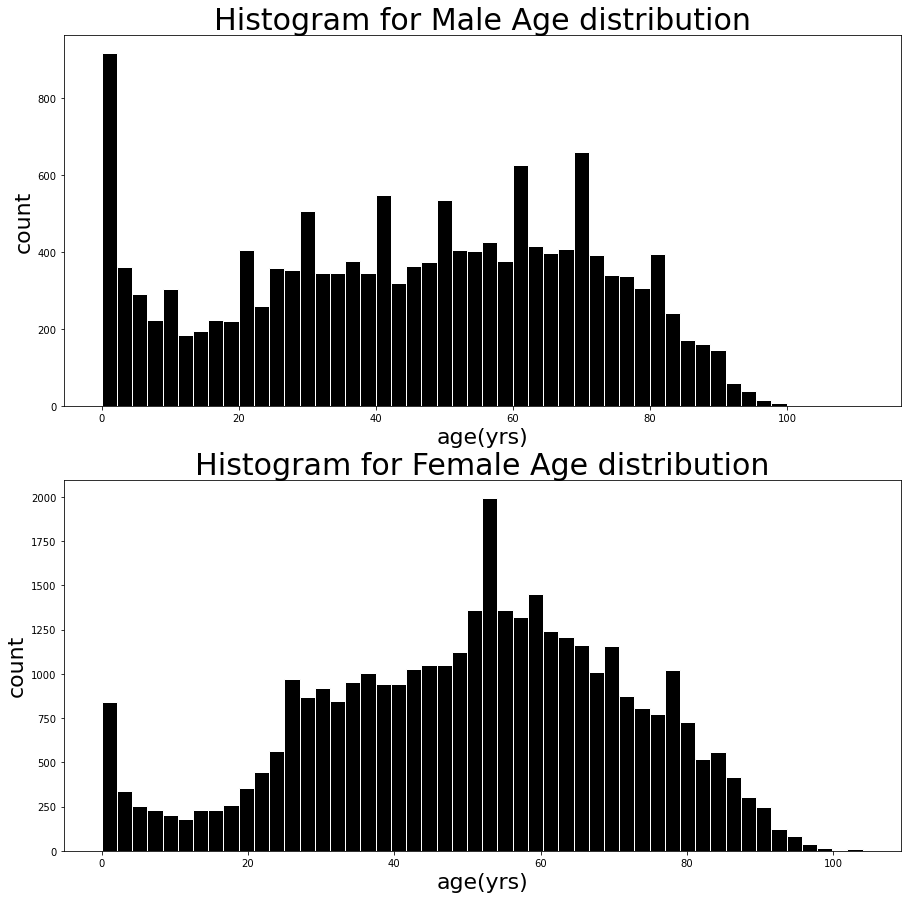

In [134]:
male = sorted(gender_age_dist["M"])
female = sorted(gender_age_dist["F"])
population = [male,female]
name = ["Male","Female"]
f = plt.figure(figsize=(15,15))
for i in range(2):
    ax = plt.subplot(2, 1, i + 1)
    ax.hist(population[i],
         color = 'black', edgecolor = 'white',bins = 50)
    # Title and labels
    ax.set_title('Histogram for %s Age distribution'%name[i], size = 30)
    ax.set_xlabel('age(yrs)', size = 22)
    ax.set_ylabel('count', size= 22)

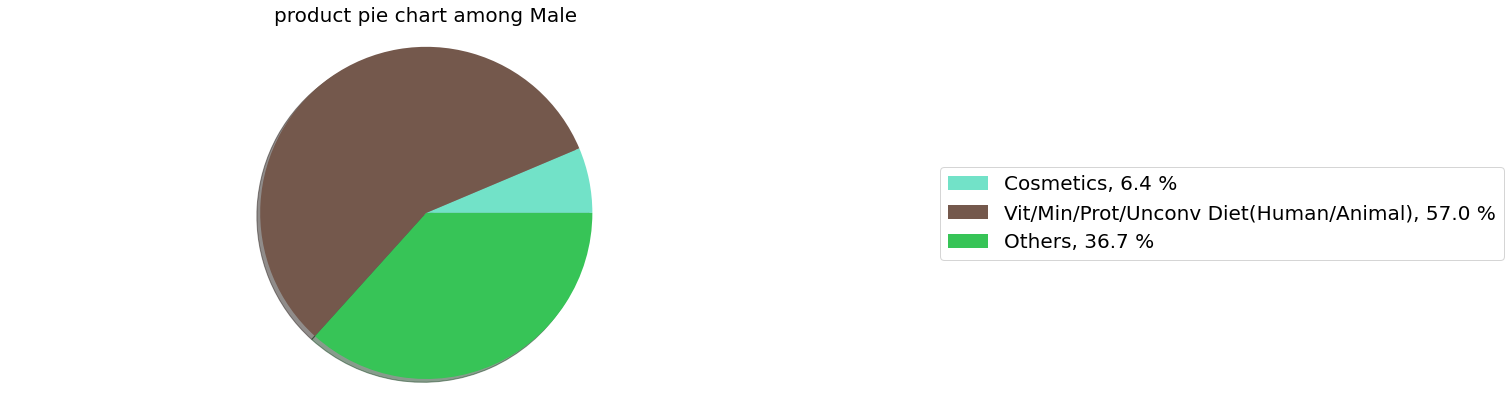

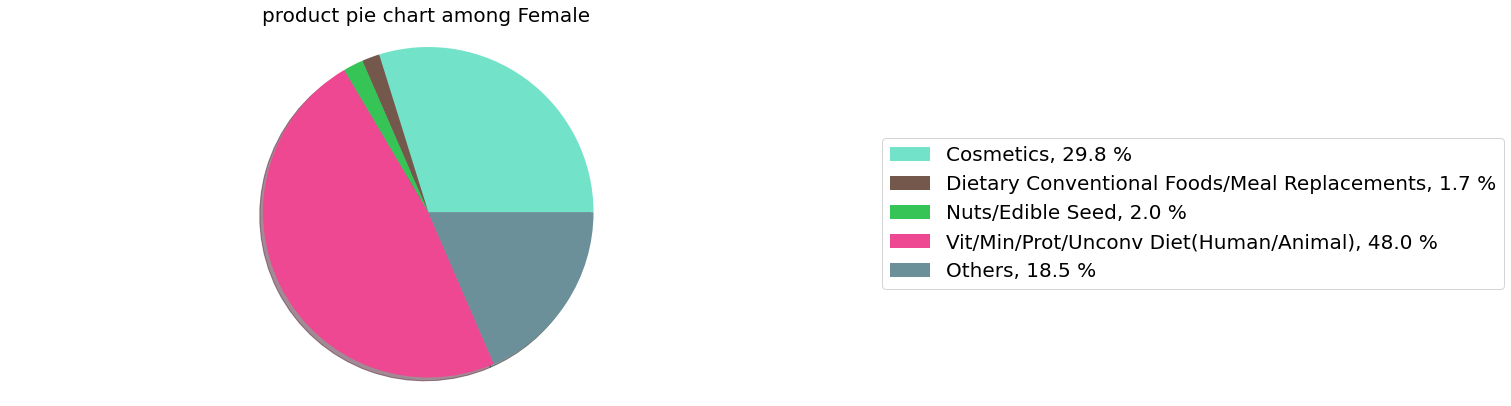

In [145]:
import random
dicts = [male_code_count,female_code_count]
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(15)]
for i in range(2):
    f = plt.figure(figsize=(15,15))
    ax = plt.subplot(2, 1, i + 1)
    labels = sorted([code_to_des[a][0] for a in dicts[i].keys()])
    sizes = [dicts[i][des_to_code[a][0]] for a in labels if dicts[i][des_to_code[a][0]]>600]
    big_labels = [a for a in labels if dicts[i][des_to_code[a][0]]>600]
    other_size = sum([dicts[i][des_to_code[a][0]] for a in labels if a not in big_labels])
    big_labels.append('Others')
    sizes.append(other_size)
    total = sum(sizes)
    labels = ['%s, %1.1f %%' % (l, 100*s/total) for l, s in zip(big_labels, sizes)]
    patches,texts = ax.pie(sizes,colors = color,
            shadow=True)
    ax.set_title("product pie chart among %s"%name[i],size = 20)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.legend(patches, labels, loc='right',bbox_to_anchor = (0.8,0,1,1),
               fontsize=20)

In [4]:
df

,Unnamed: 0,report_id,caers_created_date,date_of_event,product_type,product,product_code,description,patient_age,age_units,sex,medra_preferred_terms,outcomes
0,0,2018-CFS-000002,1/2/2018,5/14/2017,SUSPECT,CORAL CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"BLOOD CALCIUM INCREASED, RENAL DISORDER","Hospitalization, Patient Visited ER,"
1,1,2018-CFS-000007,1/2/2018,NaN,SUSPECT,CELLUCOR ALPHA AMINO,54,Vit/Min/Prot/Unconv Diet(Human/Animal),15.0,year(s),M,"DYSPNOEA, OCULAR HYPERAEMIA, OCULAR HYPERAEMIA...","Other Seriousness, Patient Visited ER,"
2,2,2018-CFS-000008,1/2/2018,NaN,SUSPECT,Eco Style Professional Styling Gel Black Cast...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome
3,3,2018-CFS-000009,1/2/2018,NaN,SUSPECT,ECO STYLE PROFESSIONAL STYLING GEL BLACK CASTO...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome
4,4,2018-CFS-000010,1/2/2018,NaN,SUSPECT,SOY MASKING AGENTS,45,Food Additives (Human Use),36.0,year(s),F,"EYE IRRITATION, THROAT IRRITATION","Disability,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97508,50040,172925,12/31/2013,NaN,SUSPECT,NUTRILITE GLUCOSE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),43.0,year(s),F,DYSPNOEA,Hospitalization
97509,50043,172883,12/31/2013,NaN,SUSPECT,PURITANS PRIDE BONE CARE COATED CAPLETS,54,Vit/Min/Prot/Unconv Diet(Human/Animal),81.0,year(s),F,"TRANSIENT ISCHAEMIC ATTACK, CONFUSIONAL STATE,...","Hospitalization, Medically Important, Patient ..."
97510,50050,172888,12/31/2013,NaN,CONCOMITANT,FISH OIL (FISH OIL),54,Vit/Min/Prot/Unconv Diet(Human/Animal),87.0,year(s),F,"DYSPHAGIA, CHOKING",Medically Important
97511,50052,172889,12/31/2013,NaN,SUSPECT,"CENTRUM SILVER WOMEN'S 50+ (MULTIMINERALS, MUL...",54,Vit/Min/Prot/Unconv Diet(Human/Animal),86.0,year(s),F,CHOKING,Medically Important
